In [1]:
import os
import sys
from pathlib import Path

import torch
import torchio

sys.path.append('..')

from src.utils import remove_legs
from src.data_structs.patient import Image
from src.visualisation import PatientSnapshot

In [2]:
data_dir = Path('../data/')
paths = [data_dir/p for p in ['1', '2', '3']]

In [3]:
subjects = []
for image_path in paths:
    subject = torchio.Subject(
        Image('snapshot', image_path, torchio.INTENSITY),
#         Image('mask', label_path, torchio.LABEL),
    )
    subjects.append(subject)

dataset = torchio.ImagesDataset(subjects)

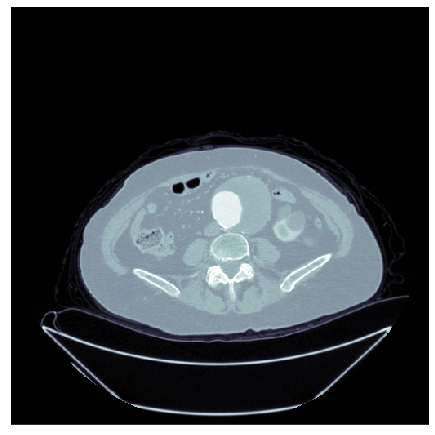

In [4]:
original_sample = dataset[0]

# Remove legs for faster processing
temp = original_sample['snapshot']['data'].numpy()[0].transpose() - 1024
wo_legs = torch.from_numpy(
    remove_legs(temp).transpose()
).unsqueeze(0) + 1024
original_sample['snapshot']['data'] = wo_legs

p = PatientSnapshot.from_torchio(original_sample)

p.horizontal_plot(z=200, vmin=-1000, vmax=500)

CPU times: user 35.7 s, sys: 19.3 s, total: 55.1 s
Wall time: 1min 22s


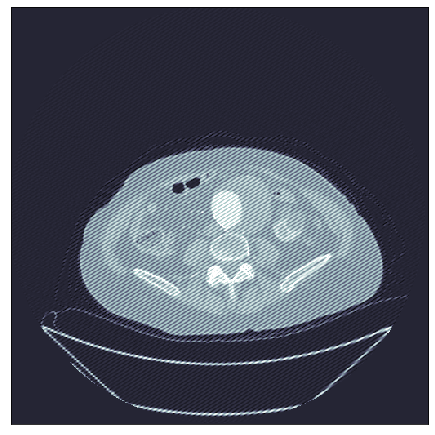

In [5]:
%%time

transform = torchio.transforms.RandomSpike()
modified_sample = transform(original_sample)
p = PatientSnapshot.from_torchio(modified_sample)

p.horizontal_plot(z=200, vmin=-1000, vmax=500)

CPU times: user 7min 57s, sys: 2.98 s, total: 8min
Wall time: 2min 16s


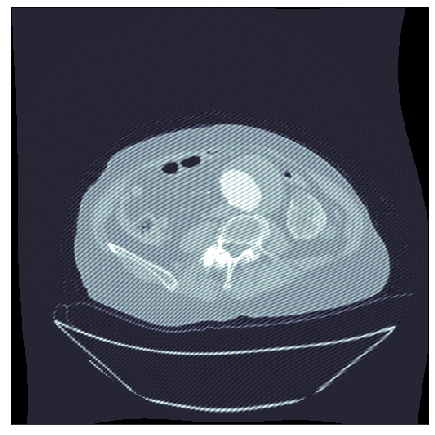

In [6]:
%%time

transform = torchio.transforms.RandomElasticDeformation(deformation_std=150)
modified_sample = transform(original_sample)
p = PatientSnapshot.from_torchio(modified_sample)

p.horizontal_plot(z=200, vmin=-1000, vmax=500)